In [2]:
import pandas as pd

In [3]:
test_data = pd.read_csv("C:/Users/DHRUVI/Downloads/test.csv")
train_data = pd.read_csv("C:/Users/DHRUVI/Downloads/train.csv")

In [4]:
print(test_data)

     Roll no test preparation   gender parental level of education  \
0   EXA32000              none    male          associate's degree   
1   EXA32001         completed    male            some high school   
2   EXA32002              none    male            some high school   
3   EXA32003         completed    male            some high school   
4   EXA32004              none  female           bachelor's degree   
..       ...               ...     ...                         ...   
95  EXA32095              none    male           bachelor's degree   
96  EXA32096         completed    male          associate's degree   
97  EXA32097              none    male                some college   
98  EXA32098         completed    male          associate's degree   
99  EXA32099              none    male                 high school   

           lunch    Section  practical score  viva score  
0       standard  Section C               74          89  
1       standard  Section E              

In [5]:
print(train_data)

         Roll no test preparation   gender parental level of education  \
0      EXA000001              none    male                some college   
1      EXA000002              none    male             master's degree   
2      EXA000003              none    male             master's degree   
3      EXA000004              none  female                some college   
4      EXA000005              none  female                 high school   
...          ...               ...     ...                         ...   
31994  EXA031995              none    male            some high school   
31995  EXA031996              none  female                 high school   
31996  EXA031997              none    male           bachelor's degree   
31997  EXA031998              none    male          associate's degree   
31998  EXA031999              none    male            some high school   

              lunch    Section  practical score  viva score  exam score  
0          standard  Section A       

In [6]:
#merging two csv-test.csv and train.csv
submission = pd.merge(test_data, train_data, how="outer")
submission.to_csv('C:/Users/DHRUVI/Downloads/submission.csv', index=False)

In [8]:
data = submission.dropna()
data

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
100,EXA000001,none,male,some college,standard,Section A,70,73,70.0
101,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52.0
102,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43.0
103,EXA000004,none,female,some college,free/reduced,Section C,35,47,41.0
104,EXA000005,none,female,high school,standard,Section C,87,92,81.0
...,...,...,...,...,...,...,...,...,...
32094,EXA031995,none,male,some high school,free/reduced,Section E,63,53,80.0
32095,EXA031996,none,female,high school,standard,Section B,100,80,68.0
32096,EXA031997,none,male,bachelor's degree,free/reduced,Section B,62,61,74.0
32097,EXA031998,none,male,associate's degree,standard,Section D,75,32,82.0


In [9]:
print(submission.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
32094    False
32095    False
32096    False
32097    False
32098    False
Length: 32099, dtype: bool


In [10]:
#finding mean of practical score
Mean = submission["practical score"].mean()
Mean

67.83161469204649

In [11]:
#finding median of practical score
Median = submission["practical score"].median()
Median

68.0

In [12]:
#finding mode of practical score
Mode = submission["practical score"].mode()[0]
Mode

62

In [13]:
#finding mean of viva score
Mean = submission["viva score"].mean()
Mean

70.37072806006418

In [14]:
#finding median of viva score
Median = submission["viva score"].median()
Median

70.0

In [15]:
#finding mode of viva score
Mode = submission["viva score"].mode()[0]
Mode

72

In [16]:
# Sort by 'Score' in ascending order
sorted_vivascore = submission.sort_values(by='viva score', ascending=True)
sorted_practicalscore = submission.sort_values(by='practical score', ascending=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,f1_score, precision_score, recall_score, classification_report 

In [18]:
submission.loc[submission['lunch'] == 'free/reduced', 'lunch'] = "free"

In [19]:
x = submission.iloc[:,6:8].values
x

array([[74, 89],
       [66, 75],
       [52, 55],
       ...,
       [62, 61],
       [75, 32],
       [51, 92]], dtype=int64)

In [20]:
y = submission.iloc[:,4].values
y

array(['standard', 'standard', 'standard', ..., 'free', 'standard',
       'standard'], dtype=object)

In [21]:
#spliting the dataset 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 108)
x_train

array([[78, 44],
       [72, 74],
       [67, 45],
       ...,
       [55, 86],
       [57, 76],
       [69, 79]], dtype=int64)

In [22]:
x_test

array([[85, 52],
       [94, 81],
       [69, 62],
       ...,
       [77, 58],
       [79, 80],
       [74, 93]], dtype=int64)

In [23]:
y_train

array(['standard', 'standard', 'standard', ..., 'standard', 'free',
       'free'], dtype=object)

In [24]:
y_test

array(['standard', 'standard', 'standard', ..., 'standard', 'standard',
       'free'], dtype=object)

In [25]:
#handling missing values

missing_values = submission.isna().sum()
missing_values 

Roll no                          0
test preparation                 0
gender                           0
parental level of education      0
lunch                            0
Section                          0
practical score                  0
viva score                       0
exam score                     100
dtype: int64

In [26]:
#transforming categorial variables into numerical representation

LB = LabelEncoder()
Y = LB.fit_transform(y)
Y

array([1, 1, 1, ..., 0, 1, 1])

In [27]:
#implementing the classification

knn = KNeighborsClassifier()
model = knn.fit(x_train, y_train)
model

KNeighborsClassifier()

In [28]:
y_prediction = model.predict(x_test)
y_prediction

array(['standard', 'standard', 'standard', ..., 'free', 'standard',
       'standard'], dtype=object)

In [29]:
knn.score(x_test, y_test)

0.6101246105919003

In [30]:
#accuracy score

accuracy_score(y_test, y_prediction)

0.6101246105919003

In [31]:
#confusion matrix

cm = confusion_matrix(y_test, y_prediction)
cm

array([[ 509, 1630],
       [ 873, 3408]], dtype=int64)

In [32]:
#precision score

precision_score(y_test, y_prediction, average = 'weighted')

0.5737895408611635

In [33]:
#recall score

recall_score(y_test, y_prediction, average = 'weighted')

0.6101246105919003

In [34]:
#F1 score

f1_score(y_test, y_prediction, average = 'weighted')

0.5840489944255526

In [35]:
#classification_report

classification_report(y_test, y_prediction)

'              precision    recall  f1-score   support\n\n        free       0.37      0.24      0.29      2139\n    standard       0.68      0.80      0.73      4281\n\n    accuracy                           0.61      6420\n   macro avg       0.52      0.52      0.51      6420\nweighted avg       0.57      0.61      0.58      6420\n'

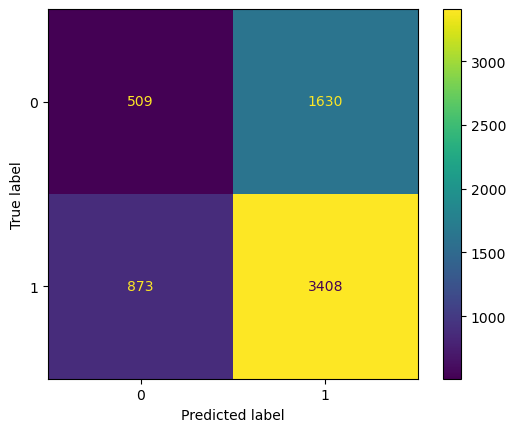

In [36]:
#Plotting graph
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

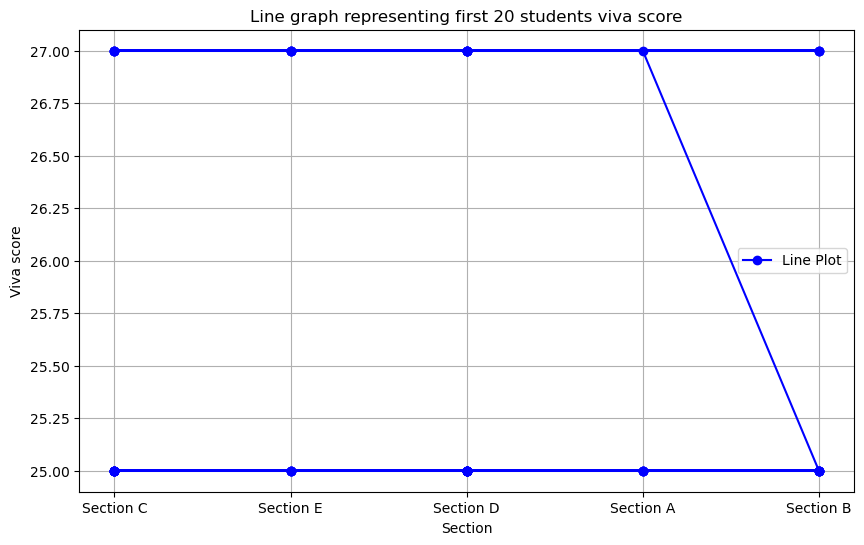

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_20_data_score = sorted_vivascore.head(51)
top_20_data_section = submission['Section'].head(51)
plt.plot(top_20_data_section, top_20_data_score['viva score'], marker='o', linestyle='-', color='b', label='Line Plot')
plt.xlabel('Section')
plt.ylabel('Viva score')
plt.title('Line graph representing first 20 students viva score')
plt.legend()
plt.grid(True)
plt.show()

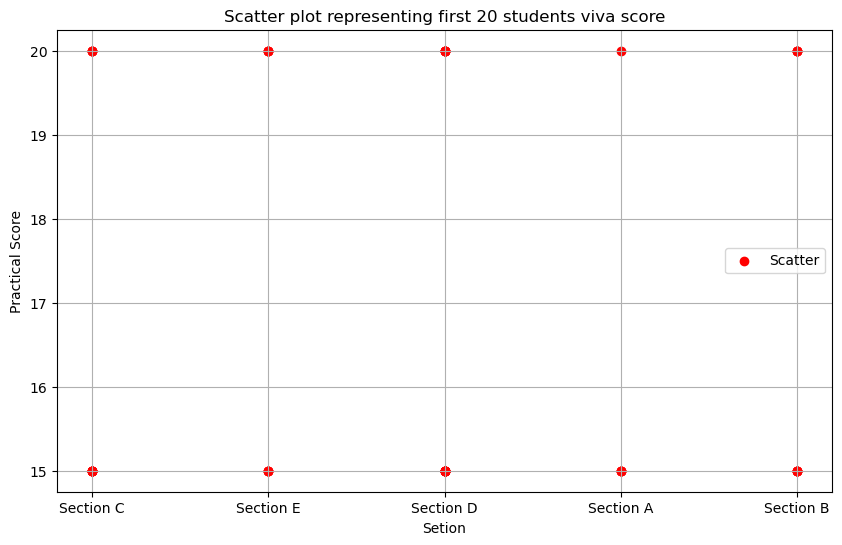

In [38]:
plt.figure(figsize=(10, 6))
top_20_data_score = sorted_practicalscore.head(51)
top_20_data_section = submission['Section'].head(51)
plt.scatter(top_20_data_section, top_20_data_score['practical score'], marker='o', color='red', label='Scatter')
plt.xlabel('Setion')
plt.ylabel('Practical Score')
plt.title('Scatter plot representing first 20 students viva score')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
model = svm.fit(x_train,y_train)
y_prediction = model.predict(x_test)
y_prediction

array(['standard', 'standard', 'standard', ..., 'standard', 'standard',
       'standard'], dtype=object)

In [41]:
accuracy_score(y_test,y_prediction,normalize=True)

0.6668224299065421

In [42]:
cm=confusion_matrix(y_test,y_prediction)
cm

array([[   0, 2139],
       [   0, 4281]], dtype=int64)

In [43]:
svm_precision = precision_score(y_test,y_prediction,average="weighted")
print(svm_precision)

0.44465215302646516


C:\Users\DHRUVI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
svm_recall = recall_score(y_test,y_prediction,average="weighted")
print(svm_recall)

0.6668224299065421


In [45]:
svm_f1 = f1_score(y_test,y_prediction,average='weighted')
print(svm_f1)

0.533532720760659


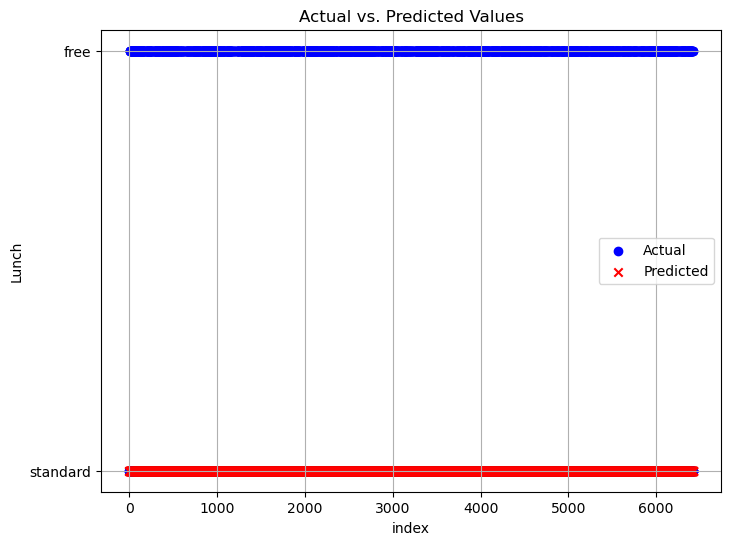

In [49]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})

# Plot a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(results.index, results['Actual'], color='blue', label='Actual', marker='o')
plt.scatter(results.index, results['Predicted'], color='red', label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('index')
plt.ylabel('Lunch')
plt.legend()
plt.grid(True)
plt.show()